# Sugar’s Influence on Recipe Ratings: An Investigation into Variance Differences

**Name(s)**:Nuojinli Xu, Jiaxin He

**Website Link**: (your website link)

In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
import time

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.
from tqdm import tqdm
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.model_selection import train_test_split

## Step 1: Introduction

In [8]:
df1 = pd.read_csv("RAW_interactions.csv")
df1

user_id  recipe_id        date  rating  \
0          1293707      40893  2011-12-21       5   
1           126440      85009  2010-02-27       5   
2            57222      85009  2011-10-01       5   
3           124416     120345  2011-08-06       0   
4       2000192946     120345  2015-05-10       2   
...            ...        ...         ...     ...   
731922  2002357020      82303  2018-12-05       5   
731923      583662     386618  2009-09-29       5   
731924      157126      78003  2008-06-23       5   
731925       53932      78003  2009-01-11       4   
731926  2001868099      78003  2017-12-18       5   

                                                   review  
0       So simple, so delicious! Great for chilly fall...  
1       I made the Mexican topping and took it to bunk...  
2       Made the cheddar bacon topping, adding a sprin...  
3       Just an observation, so I will not rate.  I fo...  
4       This recipe was OVERLY too sweet.  I would sta...  
...                                                   ...  
731922  Delicious quick thick chocolate sauce with ing...  
731923  These were so delicious!  My husband and I tru...  
731924  WOW!  Sometimes I don't take the time to rate ...  
731925  Very good!  I used regular port as well.  The ...  
731926  I am so glad I googled and found this here. Th...  

[731927 rows x 5 columns]

In [9]:
df2 = pd.read_csv("RAW_recipes.csv")
df2 

name      id  minutes  \
0              1 brownies in the world    best ever  333281       40   
1                1 in canada chocolate chip cookies  453467       45   
2                            412 broccoli casserole  306168       40   
3                            millionaire pound cake  286009      120   
4                                     2000 meatloaf  475785       90   
...                                             ...     ...      ...   
83777                                   zydeco soup  486161       60   
83778                              zydeco spice mix  493372        5   
83779                     zydeco ya ya deviled eggs  308080       40   
83780        cookies by design   cookies on a stick  298512       29   
83781  cookies by design   sugar shortbread cookies  298509       20   

       contributor_id   submitted  \
0              985201  2008-10-27   
1             1848091  2011-04-11   
2               50969  2008-05-30   
3              461724  2008-02-12   
4             2202916  2012-03-06   
...               ...         ...   
83777          227978  2012-08-29   
83778         1500678  2013-01-09   
83779           37779  2008-06-07   
83780          506822  2008-04-15   
83781          506822  2008-04-15   

                                                    tags  \
0      ['60-minutes-or-less', 'time-to-make', 'course...   
1      ['60-minutes-or-less', 'time-to-make', 'cuisin...   
2      ['60-minutes-or-less', 'time-to-make', 'course...   
3      ['time-to-make', 'course', 'cuisine', 'prepara...   
4      ['time-to-make', 'course', 'main-ingredient', ...   
...                                                  ...   
83777  ['ham', '60-minutes-or-less', 'time-to-make', ...   
83778  ['15-minutes-or-less', 'time-to-make', 'course...   
83779  ['60-minutes-or-less', 'time-to-make', 'course...   
83780  ['30-minutes-or-less', 'time-to-make', 'course...   
83781  ['30-minutes-or-less', 'time-to-make', 'course...   

                                           nutrition  n_steps  \
0           [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   
1       [595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]       12   
2          [194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]        6   
3      [878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]        7   
4         [267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]       17   
...                                              ...      ...   
83777    [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
83778          [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
83779           [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
83780      [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
83781       [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                   steps  \
0      ['heat the oven to 350f and arrange the rack i...   
1      ['pre-heat oven the 350 degrees f', 'in a mixi...   
2      ['preheat oven to 350 degrees', 'spray a 2 qua...   
3      ['freheat the oven to 300 degrees', 'grease a ...   
4      ['pan fry bacon , and set aside on a paper tow...   
...                                                  ...   
83777  ['heat oil in a 4-quart dutch oven', 'add cele...   
83778        ['mix all ingredients together thoroughly']   
83779  ['in a bowl , combine the mashed yolks and may...   
83780  ['place melted butter in a large mixing bowl a...   
83781  ['whip sugar and shortening in a large bowl , ...   

                                             description  \
0      these are the most; chocolatey, moist, rich, d...   
1      this is the recipe that we use at my school ca...   
2      since there are already 411 recipes for brocco...   
3      why a millionaire pound cake?  because it's su...   
4      ready, set, cook! special edition contest entr...   
...                                                  ...   
83777  this is a delicious soup that i originally fou...   
83778    this spice mix will make 

In [10]:
df = df1.merge(df2, left_on="recipe_id", right_on= "id", how = "inner")
df = df[df["minutes"] < 600]
df.isna().sum()

user_id             0
recipe_id           0
date                0
rating              0
review             55
name                1
id                  0
minutes             0
contributor_id      0
submitted           0
tags                0
nutrition           0
n_steps             0
steps               0
description       113
ingredients         0
n_ingredients       0
dtype: int64

In [11]:
#rating distribution
px.histogram(df, x = "rating")

In [12]:
#minute distribution
px.histogram(df, x = "minutes")

In [13]:
#ingredient distribution
px.histogram(df, x = "n_ingredients")

## Step 2: Data Cleaning and Exploratory Data Analysis

In [14]:
#df_clean = df.dropna(how = "any")
df_clean = df[["user_id", "recipe_id", "rating", "nutrition", "n_ingredients"]]
df_clean.loc[:,"nutrition"] = df_clean["nutrition"].apply(lambda x: eval(x))
df_clean

user_id  recipe_id  rating  \
0        483827     306785       5   
1          5060     310237       5   
2        935485     321038       5   
3        539686     321038       5   
4         22174     342209       4   
...         ...        ...     ...   
234423  1963163     451490       5   
234424   169430     492861       5   
234425   128473     492861       5   
234426   169430     470995       5   
234427   583662     386618       5   

                                           nutrition  n_ingredients  
0             [95.3, 1.0, 50.0, 16.0, 5.0, 0.0, 7.0]              8  
1            [143.5, 5.0, 25.0, 3.0, 10.0, 3.0, 7.0]             10  
2           [182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]             14  
3           [182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]             14  
4       [658.2, 45.0, 151.0, 35.0, 24.0, 72.0, 29.0]             12  
...                                              ...            ...  
234423   [351.1, 15.0, 37.0, 37.0, 57.0, 17.0, 11.0]              8  
234424          [16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]              4  
234425          [16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]              4  
234426      [397.0, 62.0, 0.0, 8.0, 10.0, 28.0, 1.0]              3  
234427      [124.7, 1.0, 11.0, 24.0, 10.0, 0.0, 8.0]              8  

[231768 rows x 5 columns]

In [15]:
df_clean.loc[:,'sugar'] = df_clean["nutrition"].apply(lambda x: x[2])
df_clean.loc[:,'protein'] = df_clean["nutrition"].apply(lambda x: x[4])
df_clean 

/var/folders/dc/0tzq9tns6p568gm98yhvcf8h0000gn/T/ipykernel_68021/2924092695.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dc/0tzq9tns6p568gm98yhvcf8h0000gn/T/ipykernel_68021/2924092695.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



user_id  recipe_id  rating  \
0        483827     306785       5   
1          5060     310237       5   
2        935485     321038       5   
3        539686     321038       5   
4         22174     342209       4   
...         ...        ...     ...   
234423  1963163     451490       5   
234424   169430     492861       5   
234425   128473     492861       5   
234426   169430     470995       5   
234427   583662     386618       5   

                                           nutrition  n_ingredients  sugar  \
0             [95.3, 1.0, 50.0, 16.0, 5.0, 0.0, 7.0]              8   50.0   
1            [143.5, 5.0, 25.0, 3.0, 10.0, 3.0, 7.0]             10   25.0   
2           [182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]             14   50.0   
3           [182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]             14   50.0   
4       [658.2, 45.0, 151.0, 35.0, 24.0, 72.0, 29.0]             12  151.0   
...                                              ...            ...    ...   
234423   [351.1, 15.0, 37.0, 37.0, 57.0, 17.0, 11.0]              8   37.0   
234424          [16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]              4    0.0   
234425          [16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]              4    0.0   
234426      [397.0, 62.0, 0.0, 8.0, 10.0, 28.0, 1.0]              3    0.0   
234427      [124.7, 1.0, 11.0, 24.0, 10.0, 0.0, 8.0]              8   11.0   

        protein  
0           5.0  
1          10.0  
2          11.0  
3          11.0  
4          24.0  
...         ...  
234423     57.0  
234424      0.0  
234425      0.0  
234426     10.0  
234427     10.0  

[231768 rows x 7 columns]

### Univariate Analysis ###

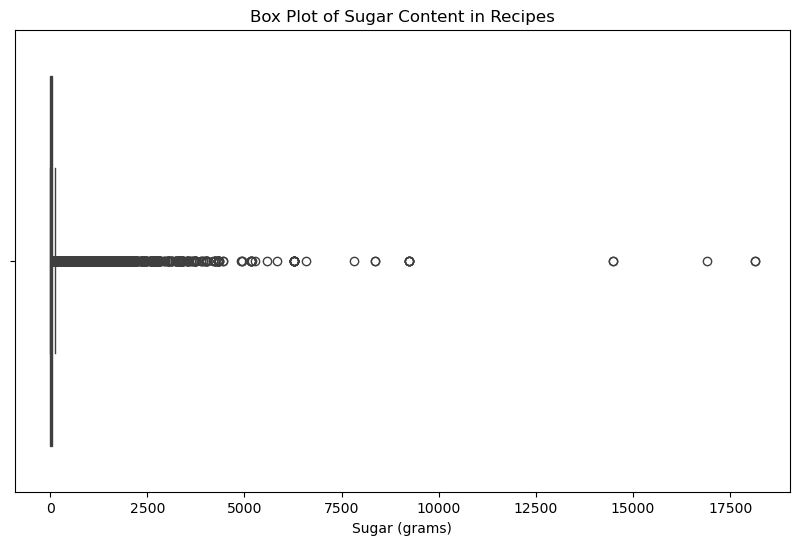

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['sugar'])
plt.title('Box Plot of Sugar Content in Recipes')
plt.xlabel('Sugar (grams)')
plt.show()

As part of our preliminary data exploration, we visualized the distribution of sugar content across all recipes using a box plot, as shown above. These values were determined to be outliers, significantly deviating from the typical range of sugar content observed in the majority of recipes. To ensure the robustness of our predictive modeling and subsequent analyses, we decided to exclude these outlier values from our dataset. This step helps in focusing our analysis on more typical instances, ensuring more generalizable and relevant insights.


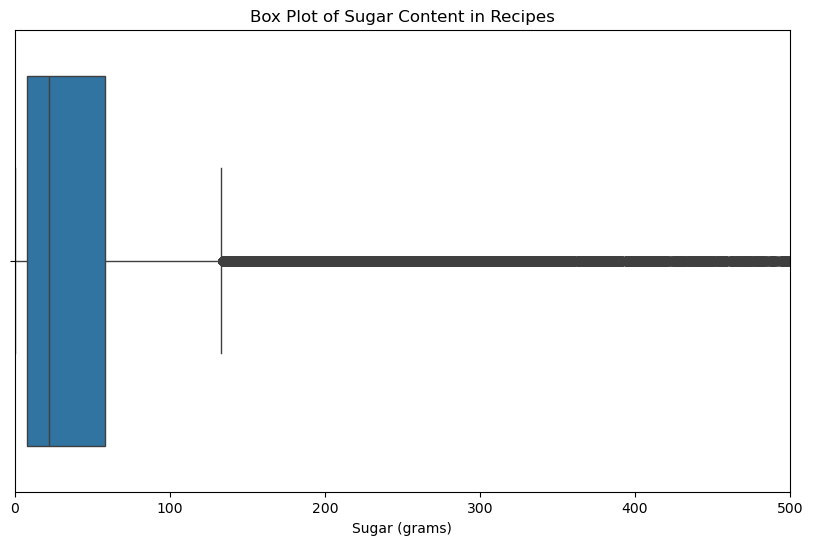

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['sugar'])
plt.title('Box Plot of Sugar Content in Recipes')
plt.xlabel('Sugar (grams)')
plt.xlim(0, 500)
plt.show()


Interpretation of the Adjusted Box Plot
Main Box (IQR): The box represents the interquartile range (IQR), which contains the middle 50% of the data. This indicates where the bulk of your recipes' sugar content lies.
Whiskers: Extend to the smallest and largest values that are not considered outliers. In this plot, it looks like the upper whisker ends just below 200 grams, suggesting that any values beyond this point are relatively rare.
Outliers: The absence of points beyond the whiskers in this plot simplifies the interpretation, emphasizing that very few, if any, recipes exceed the 300-gram threshold.

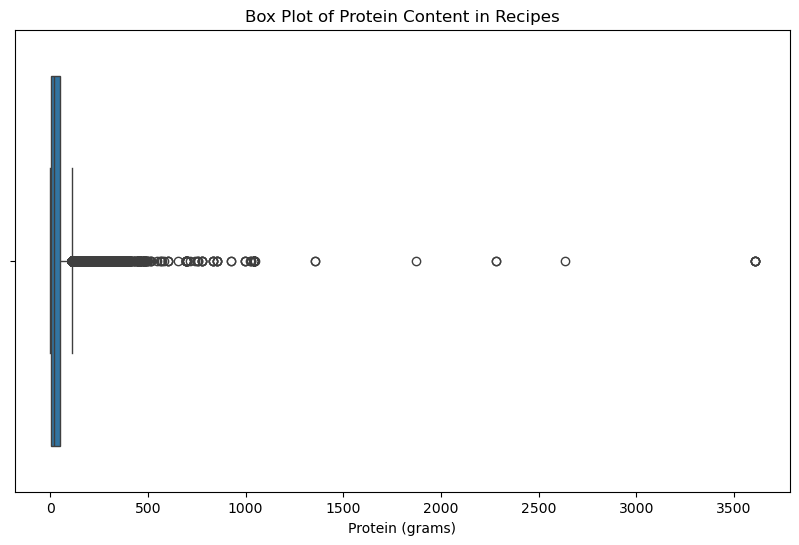

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['protein'])
plt.title('Box Plot of Protein Content in Recipes')
plt.xlabel('Protein (grams)')
plt.show()

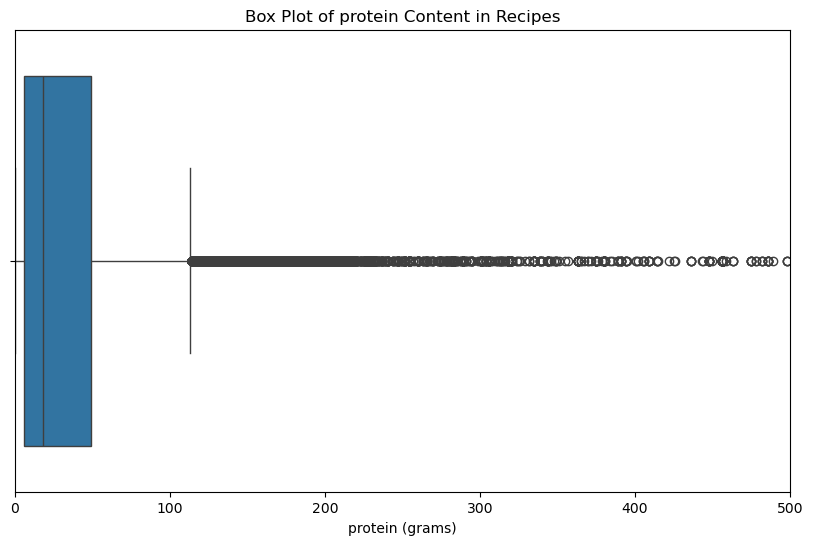

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['protein'])
plt.title('Box Plot of protein Content in Recipes')
plt.xlabel('protein (grams)')
plt.xlim(0, 500)
plt.show()

Our analysis of protein content in recipes also led to the establishment of a cutoff at 200 grams. The decision mirrors our approach with sugar content, aimed at excluding atypical, high-protein recipes from our analysis. This threshold was based on a detailed review of the protein content distribution, where values exceeding 200 grams were identified as outliers. Such high-protein recipes are uncommon in regular diets and could skew our understanding of factors influencing recipe ratings.


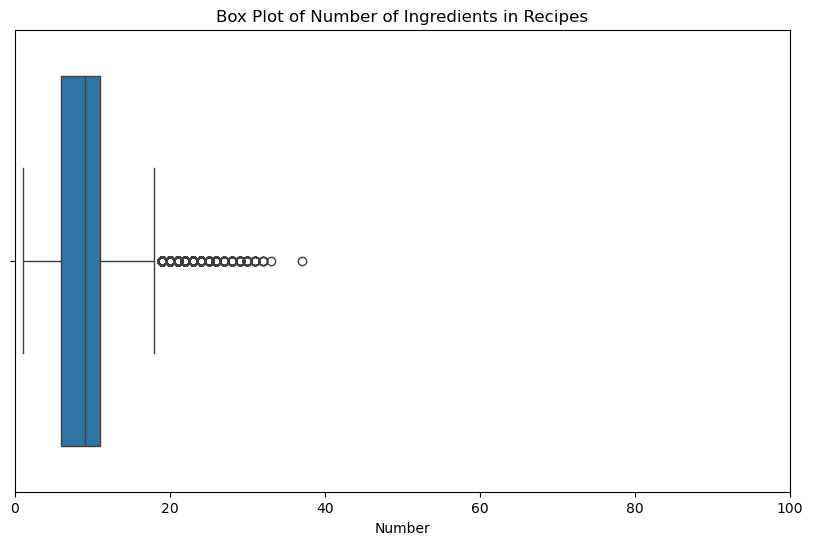

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['n_ingredients'])
plt.title('Box Plot of Number of Ingredients in Recipes')
plt.xlabel('Number')
plt.xlim(0, 100)
plt.show()

In [37]:
unique_recipe = df_clean.groupby("recipe_id").agg({"rating": "mean", "nutrition": "first", "sugar": "first", "protein": "first"})
df_graph = unique_recipe.groupby("sugar").mean(numeric_only= True)
df_graph = df_graph.reset_index()

In [51]:
df_graph

sugar    rating    protein
0      0.0  4.381640  25.324395
1      1.0  4.339240  30.226091
2      2.0  4.339967  30.338792
3      3.0  4.386225  30.540011
4      4.0  4.355238  30.534578
..     ...       ...        ...
295  295.0  4.416667  30.333333
296  296.0  4.588889  14.800000
297  297.0  4.465945  68.454545
298  298.0  4.195833  18.000000
299  299.0  3.887755  28.142857

[300 rows x 3 columns]

### Bivariate Analysis ###

In [38]:
fig = px.scatter(df_graph[df_graph['sugar'] < 300], x="sugar", y='rating', title="Relation between sugar and rating", labels={"sugar": "sugar (grams)", "rating": "Avg rating"})
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'})

#### Interpreting the Scatter Plot ####
1. Distribution Trends: The scatter plot reveals that as sugar content varies, the ratings mostly cluster between 4.2 and 4.6. There doesn't appear to be a clear trend or pattern indicating a strong linear relationship between sugar content and average ratings, as the data points are quite spread out horizontally.

2. Potential Correlation: The lack of a visible upward or downward trend suggests that there may not be a strong direct correlation between sugar content and recipe ratings. However, this does not rule out other forms of relationship or underlying factors that could influence these variables.

3. Outlier Consideration: Even with the sugar cutoff at 300 grams, the plot shows some spread in ratings at various sugar levels, but there are no extreme outliers in sugar content that distort the analysis. This supports your decision to limit sugar content to 300 grams in your analysis.



In [48]:
fig = px.scatter(df_graph, x="sugar", y="rating",
                 title="Relation between Sugar and Rating",
                 labels={"sugar": "Sugar (grams)", "rating": "Average Rating"},
                 trendline="ols")  # Adds an ordinary least squares regression line
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'})
fig.show()

In [58]:
fig =px.scatter(df_graph[df_graph['protein'] <200], x="protein", y='rating', title="Relation between sugar and rating", labels={"sugar": "sugar (grams)", "rating": "Avg rating"})
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'})



Observations from the Scatter Plot
1. Cluster of Data: The bulk of data points are clustered around lower protein levels, particularly below 40 grams of protein. Most of these points have ratings between approximately 4.2 and 4.6.

2. Sparse Data at Higher Protein Levels: There are fewer data points as protein content increases. It's noticeable that recipes with very high protein content (above 80 grams) are sparse and don't clearly indicate a consistent trend in ratings.

3. No Strong Correlation: Similar to the sugar analysis, there does not appear to be a strong or clear linear relationship between protein content and ratings. The ratings fluctuate across the range of protein content without a discernible pattern indicating that higher or lower protein directly influences higher ratings.

4. Outliers: There are a few data points at very high protein levels with a wide range of ratings. These points do not provide enough information to draw substantial conclusions due to their scarcity.

##### Interesting Aggregates ####

In [62]:
import pandas as pd

# Assuming 'df' is your DataFrame that includes 'rating', 'sugar', and 'protein'
# Define rating categories
def rating_category(rating):
    if rating < 3.5:
        return 'Low'
    elif rating <= 4.5:
        return 'Medium'
    else:
        return 'High'

# Apply the rating category function
df_clean['rating_category'] = df_clean['rating'].apply(rating_category)

# Create a pivot table
pivot_table = df_clean.pivot_table(values=['sugar', 'protein'], index='rating_category', aggfunc='mean')

pivot_table


/var/folders/dc/0tzq9tns6p568gm98yhvcf8h0000gn/T/ipykernel_68021/3332157040.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



protein      sugar
rating_category                      
High             31.840642  41.542992
Low              34.245656  45.174340
Medium           33.470921  38.878917

In [28]:
median_sugar = df_clean['sugar'].median()
df_clean = df_clean[df_clean['sugar'] < 300]
median_sugar

np.float64(22.0)

## Step 3: Assessment of Missingness

review and n_steps

In [89]:
df.isna().sum(axis=0)

user_id             0
recipe_id           0
date                0
rating              0
review             55
name                1
id                  0
minutes             0
contributor_id      0
submitted           0
tags                0
nutrition           0
n_steps             0
steps               0
description       113
ingredients         0
n_ingredients       0
dtype: int64

In [90]:
first = df[df['review'].isna()]['n_steps'].mean()
second = df[df['review'].notna()]['n_steps'].mean()
obs = abs(first - second)
obs

np.float64(3.8720802340512925)

In [99]:
result = np.array([])
for i in tqdm(range (100)):
    missingness_df = df.assign(shffuled = np.random.permutation(df['n_steps']))
    a = missingness_df[missingness_df['review'].isna()]['shffuled'].mean()
    b = missingness_df[missingness_df['review'].notna()]['shffuled'].mean()
    result = np.append(result, abs(a-b))
result

100%|██████████| 100/100 [00:13<00:00,  7.19it/s]


array([4.16714800e-01, 2.71225729e-01, 1.10683082e-01, 6.34948406e-01,
       2.34853461e-01, 5.10778028e-01, 1.36239376e+00, 4.56219626e-01,
       1.25736658e-01, 1.90797778e+00, 1.56627929e-03, 1.42008472e+00,
       1.00180364e+00, 2.41718952e+00, 3.65288957e-01, 7.10825500e-01,
       3.10730555e-01, 1.03817591e+00, 1.45332443e+00, 7.07692941e-01,
       7.11782562e-02, 1.10683082e-01, 9.80484949e-01, 7.43108148e-02,
       1.97524132e-02, 1.34734019e+00, 1.72924900e+00, 2.12621138e+00,
       1.65337190e+00, 8.38128437e-01, 3.83475090e-01, 3.80342532e-01,
       9.29059106e-01, 5.07645469e-01, 9.24969486e-02, 1.41695216e+00,
       9.47245240e-01, 1.16547885e+00, 2.92544421e-01, 7.47197768e-01,
       8.19942303e-01, 2.34853461e-01, 3.25784130e-01, 1.25736658e-01,
       7.62251343e-01, 3.65288957e-01, 1.43922792e-01, 5.83522563e-01,
       4.92591894e-01, 9.24969486e-02, 1.01685722e+00, 1.85341937e+00,
       6.38080965e-01, 1.97524132e-02, 1.34734019e+00, 8.16809745e-01,
      

In [100]:
(result > obs).mean()

np.float64(0.0)

## Step 4: Hypothesis Testing

In [101]:
np.random.seed(int(time.time()))
result = np.array([])
for i in tqdm(range (100)):
    shuffled = df_clean.assign(shuffle = np.random.permutation(df_clean['sugar']))
    a = shuffled[shuffled['shuffle'] > 150]['rating'].var()
    b  = shuffled[shuffled['shuffle'] <= 150]['rating'].var()
    diff = abs(a-b)
    result = np.append(result,diff)

100%|██████████| 100/100 [00:02<00:00, 36.93it/s]


In [97]:
p_value = (result > d).mean()
p_value

NameError: name 'd' is not defined

## Step 5: Framing a Prediction Problem

Predict rating based on suagr, protein and num ingredient

In [102]:
df_clean

user_id  recipe_id  rating  \
0        483827     306785       5   
1          5060     310237       5   
2        935485     321038       5   
3        539686     321038       5   
4         22174     342209       4   
...         ...        ...     ...   
234423  1963163     451490       5   
234424   169430     492861       5   
234425   128473     492861       5   
234426   169430     470995       5   
234427   583662     386618       5   

                                           nutrition  n_ingredients  sugar  \
0             [95.3, 1.0, 50.0, 16.0, 5.0, 0.0, 7.0]              8   50.0   
1            [143.5, 5.0, 25.0, 3.0, 10.0, 3.0, 7.0]             10   25.0   
2           [182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]             14   50.0   
3           [182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]             14   50.0   
4       [658.2, 45.0, 151.0, 35.0, 24.0, 72.0, 29.0]             12  151.0   
...                                              ...            ...    ...   
234423   [351.1, 15.0, 37.0, 37.0, 57.0, 17.0, 11.0]              8   37.0   
234424          [16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]              4    0.0   
234425          [16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]              4    0.0   
234426      [397.0, 62.0, 0.0, 8.0, 10.0, 28.0, 1.0]              3    0.0   
234427      [124.7, 1.0, 11.0, 24.0, 10.0, 0.0, 8.0]              8   11.0   

        protein  
0           5.0  
1          10.0  
2          11.0  
3          11.0  
4          24.0  
...         ...  
234423     57.0  
234424      0.0  
234425      0.0  
234426     10.0  
234427     10.0  

[225063 rows x 7 columns]

## Step 6: Baseline Model

Multiple Linear Regression with feature enginnering

Standarize sugar, protein and quantile n_ingredient

In [104]:
X = df_clean[['sugar', 'protein', 'n_ingredients']]
y = df_clean['rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [105]:
preproc = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), ['sugar', 'protein']),
        ('quantile', QuantileTransformer(n_quantiles=5), ['n_ingredients']),
    ],
    remainder="drop"
)
pl = Pipeline([
    ('preproc', preproc),
    ('lr', LinearRegression())
])
pl.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['sugar', 'protein']),
                                                 ('quantile',
                                                  QuantileTransformer(n_quantiles=5),
                                                  ['n_ingredients'])])),
                ('lr', LinearRegression())])

In [109]:
def rmse(actual, pred):
    return np.sqrt(np.mean((actual-pred)**2))

In [113]:
y_train_pred = pl.predict(X_train)
y_test_pred = pl.predict(X_test)
pd.DataFrame(
    {
        "Train": rmse(y_train,y_train_pred),
        "Test": rmse(y_test, y_test_pred)
    },
    index = ['RMSE']
).T

RMSE
Train  1.325835
Test   1.321218

## Step 7: Final Model

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [115]:
X = df_clean[['sugar', 'protein', 'n_ingredients']]
y = df_clean['rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [120]:
parameters = {
    "n_estimators" : [10, 50, 100, 150],
    "max_depth" : [None, 5,10,15,20],
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'bootstrap' : [True, False],
    'min_samples_split' : [2, 5, 10, 20]
}

In [124]:
cv = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=-2)
cv.fit(X_train, y_train)

KeyboardInterrupt: 

## Step 8: Fairness Analysis

In [ ]:
# TODO